In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter as dfmt
from datetime import datetime
import struct 

In [2]:
f = open('TaurusScanMarch10.bin','rb')
s=f.read()
f.close()
numFloats=len(s)/4 
bins=256
floatsPerRow = bins
numRows=numFloats/floatsPerRow

rows = []
for j in range(int(numRows)):
    rows.append(struct.unpack(("%if" % floatsPerRow),
    			s[j*floatsPerRow*4:(j+1)*floatsPerRow*4]))

data = np.array(rows)
len(data)


4188

In [27]:
allData = {}
def METDATA(x,y,z):
    radioData = {}

    def getMeta():
        f=open(x + '.met','r')
        mets=f.readlines()
        f.close()
        metDict = {}
        for met in mets:
            val, key = [x.strip() for x in met.split("#")]
            if 'UTC' in val:
                metDict[key] = datetime.strptime(val, "%Y-%m-%d %H:%M:%S %Z")
            elif '.' in val:
                metDict[key] = float(val)
            else:
                metDict[key] = int(val)

        return metDict

    def getRadioData(file):

        f = open(file + '.bin','rb')
        s=f.read()
        f.close()
        numFloats=len(s)/4 
        bins=256
        floatsPerRow = bins
        numRows=numFloats/floatsPerRow

        rows = []
        for j in range(int(numRows)):
            rows.append(struct.unpack(("%if" % floatsPerRow),
                        s[j*floatsPerRow*4:(j+1)*floatsPerRow*4]))

        return np.array(rows)

    def buildDataFrame(file='', metDict=None, radioData=None):
        if metDict is None:
            if not file:
                raise RuntimeError("Ack. Without metadata, I need a file!")
            else:
                metDict = getMeta()
        if radioData is None:
            if not file:
                raise RuntimeError("Ack. Without radio data, I need a file!")
            else:
                radioData = getRadioData(file)

        startTime= metDict['firstAcqTimestamp UTC'].timestamp()
        endTime= metDict['lastAcqTimestamp UTC'].timestamp()
        times= np.linspace(startTime, endTime, len(radioData))
        tstamps= np.array([datetime.fromtimestamp(x) 
                  for x in times])
        tseries= pd.Series(tstamps)
        return pd.DataFrame({'time':tseries, 'energy':radioData.mean(axis=1)})
    df = buildDataFrame(x)
    #df.plot('time','energy',figsize=(14,10))
    #plt.ylabel('Radio Energy (dB)')
    #plt.grid()
    begin = y
    end = z

    fig = plt.figure(figsize=(14,10))
    ax = plt.gca()

    form_date = dfmt('%m/%d %H:%M')
    ax.xaxis.set_major_formatter(form_date)

    plt.xlabel('time (m-d h, UTC)')
    plt.ylabel('Relative Energy (dB)')
    plt.title('A recent glimps of Taurus A')
    plt.grid()
    plt.grid(color='k',linestyle =':',linewidth='1')
    plt.xticks(np.arange(begin,end,5))
    plt.plot(df.time[begin:end], df.energy[begin:end],'b-')
    radioData[x] = {'energy':df.energy[begin:end],'time':df.time[begin:end]}
    print(df.time[begin],df.time[end])
    #dt= np.append(dt,[df.energy[begin:end]])
    begin = 0
    end = 4193
    fig = plt.figure(figsize=(14,10))
    ax = plt.gca()

    form_date = dfmt('%m/%d %H:%M')
    ax.xaxis.set_major_formatter(form_date)

    plt.xlabel('time (m-d h, UTC)')
    plt.ylabel('Relative Energy (dB)')
    plt.title('A recent glimps of Taurus A')
    plt.grid()
    plt.plot(df.time[begin:], df.energy[begin:],'b')
    plt.grid(color='k',linestyle =':',linewidth='1')

    return radioData

In [ ]:
29 min 53.68214 sec
179368214


2021-03-14 23:27:05.047960 2021-03-14 23:56:58.730136


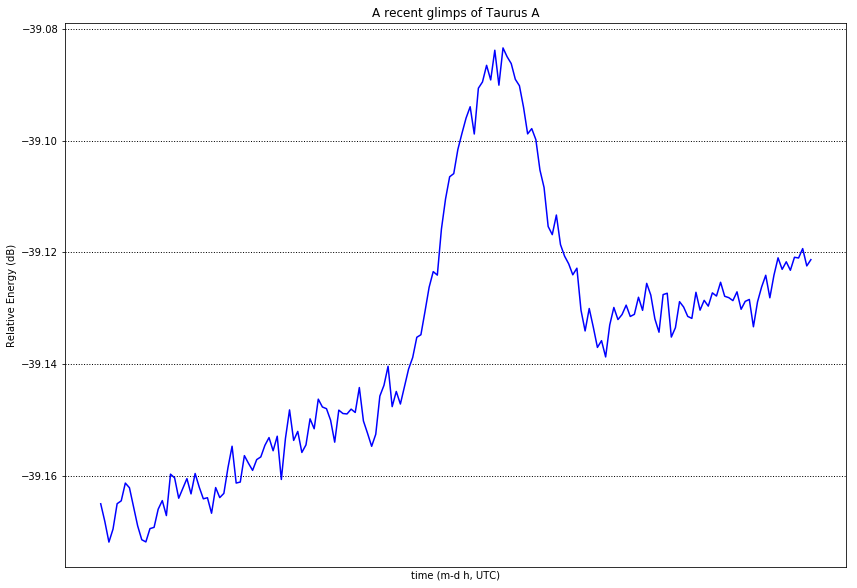

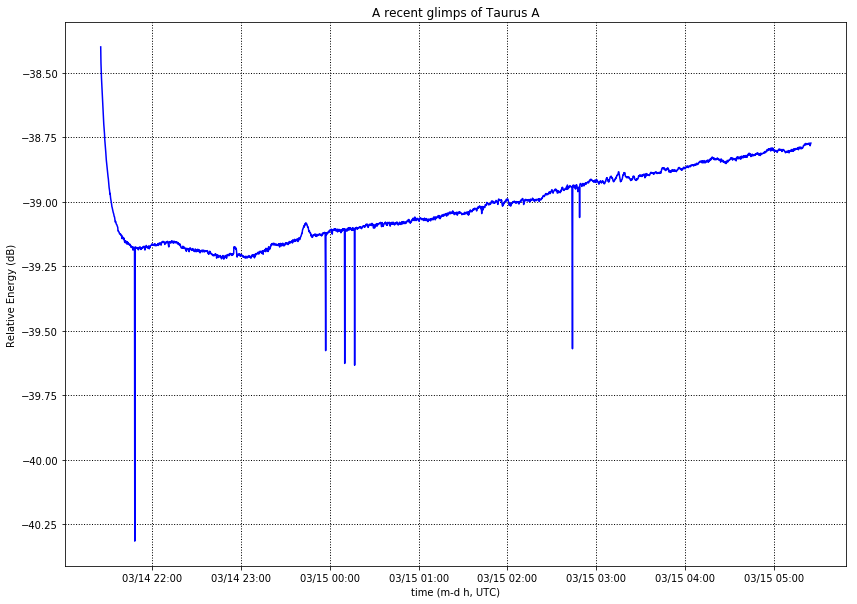

In [28]:
allData.update(METDATA('TaurusScanMarch14',710,884))

[ 5.54367099e+01  8.78203969e+00  5.72945677e-02  4.61175550e-04
 -3.91421659e+01]


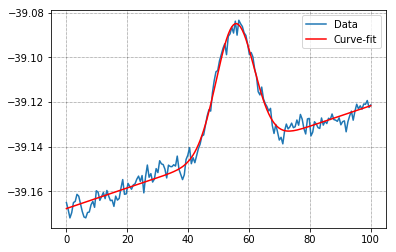

In [22]:
y = allData['TaurusScanMarch14']['energy']
dt = np.linspace(0,100,num = len(y))
from scipy.optimize import curve_fit
from scipy.misc import derivative
from math import *

def objective(x,x0,w,S,m,b):
        return  m*(x-x0) + b + S*np.exp(-((x-x0)/w)**2)
def curve_fitting(xvals,yvals,w_0=40,x0_0=22,S_0=-38.37,m_0=-0.015,b_0=-39.25,):
    x0_0=50
    S_0= -38.37
    m_0= -0.015
    b_0=-39.25 
    popt, pcov = curve_fit(objective, xvals, yvals, p0=(x0_0, w_0, S_0, m_0, b_0))
    x0 = popt[0]
    w = popt[1]
    S = popt[2]
    m = popt[3]
    b = popt[4]
    plt.plot(xvals,yvals,label='Data')
    plt.plot(xvals,objective(xvals, x0,w,S,m,b),'r-',label='Curve-fit')
    plt.legend()
    print(popt)
    plt.grid()
    plt.grid(color='k',linestyle =':',linewidth='0.5')
    return x0

x0 = curve_fitting(dt,y,30)
ix = int(np.round(len(y)*x0/100)+0.5)
allData['TaurusScanMarch14']['timeIndex'] = ix

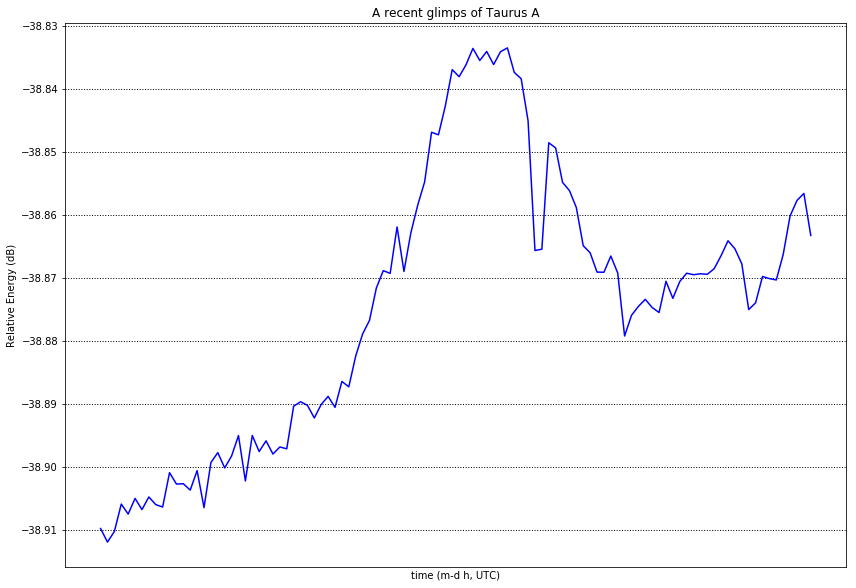

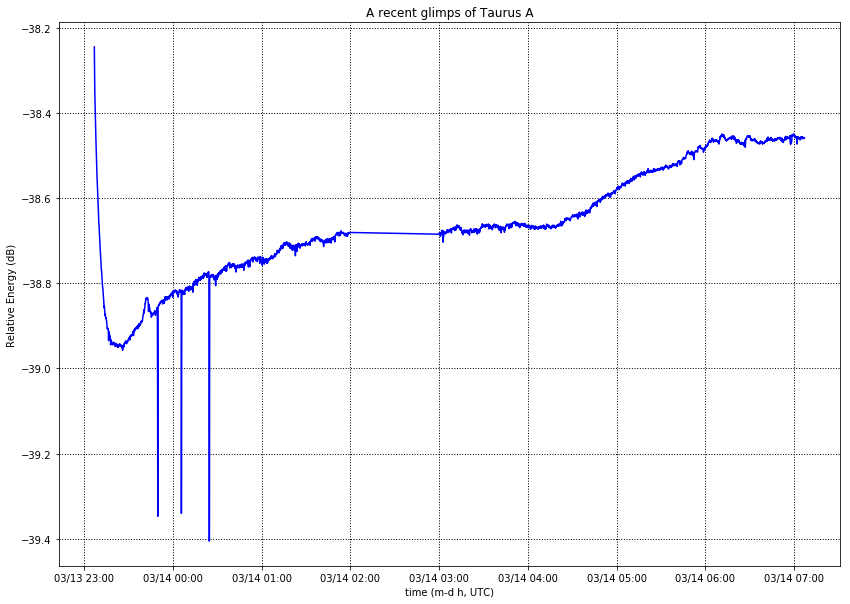

In [8]:
allData.update(METDATA('TaurusScanMarch13',180,284))

[ 5.29202786e+01  1.29857906e+01  4.93585674e-02  4.45538316e-04
 -3.88844363e+01]


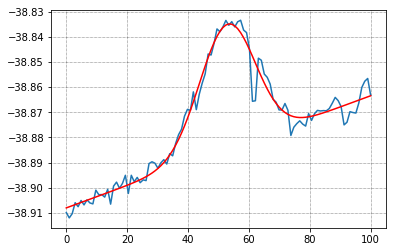

In [9]:
y = allData['TaurusScanMarch13']['energy']
dt = np.linspace(0,100,num = len(y))
x0 = curve_fitting(dt,y,40,55)
ix = int(np.round(len(y)*x0/100)+0.5)
allData['TaurusScanMarch13']['timeIndex'] = ix

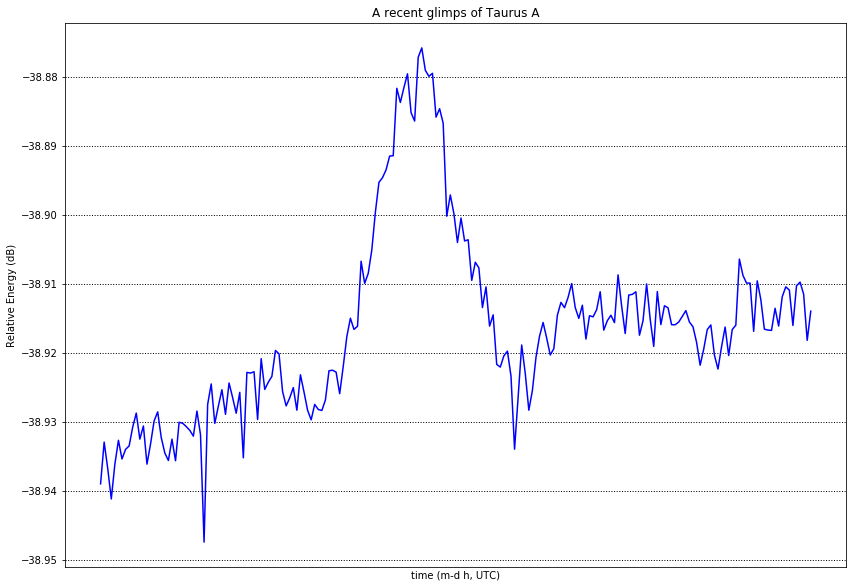

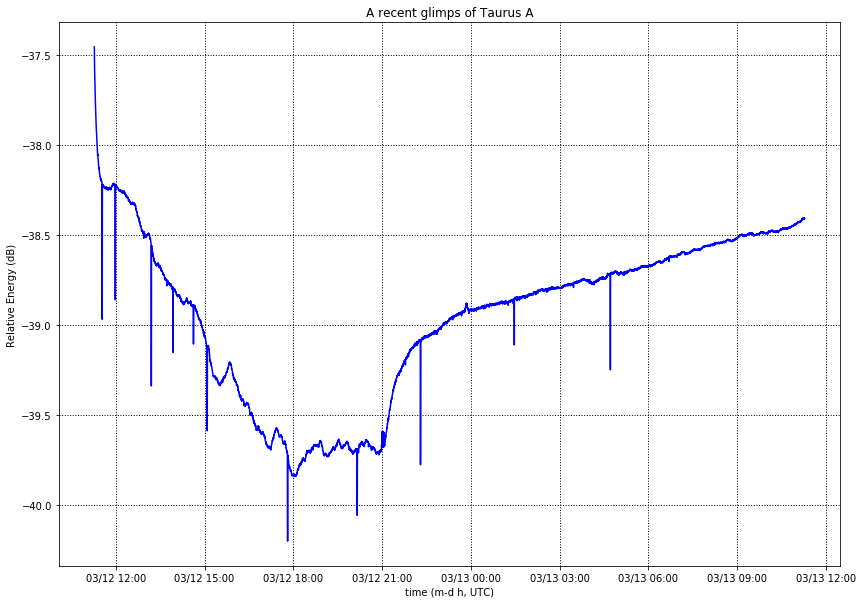

In [10]:
allData.update(METDATA('TaurusScanMarch12',4300,4500))

[ 4.43838670e+01  7.01054423e+00  4.42953109e-02  2.19985199e-04
 -3.89232207e+01]


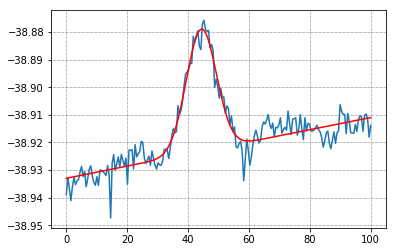

In [11]:
y = allData['TaurusScanMarch12']['energy']
dt = np.linspace(0,100,num = len(y))
x0 = curve_fitting(dt,y,30)
ix = int(np.round(len(y)*x0/100)+0.5)
allData['TaurusScanMarch12']['timeIndex'] = ix

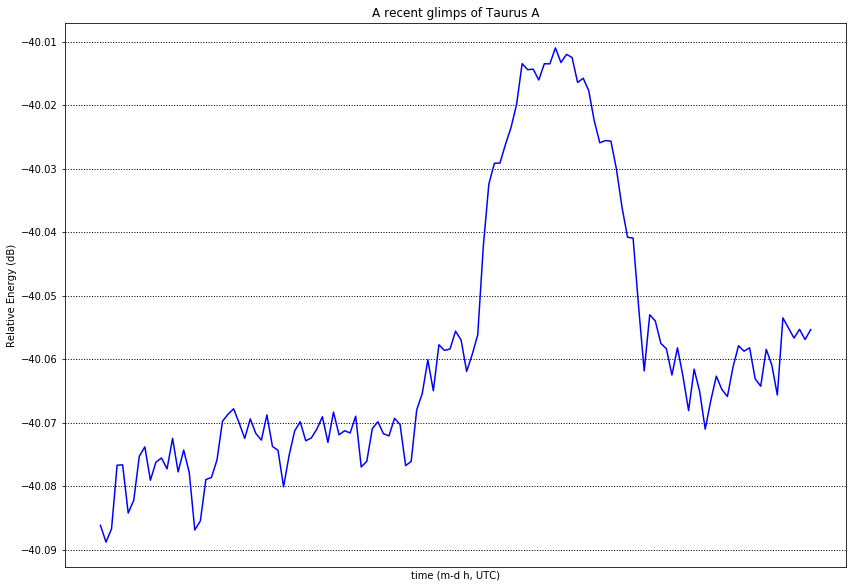

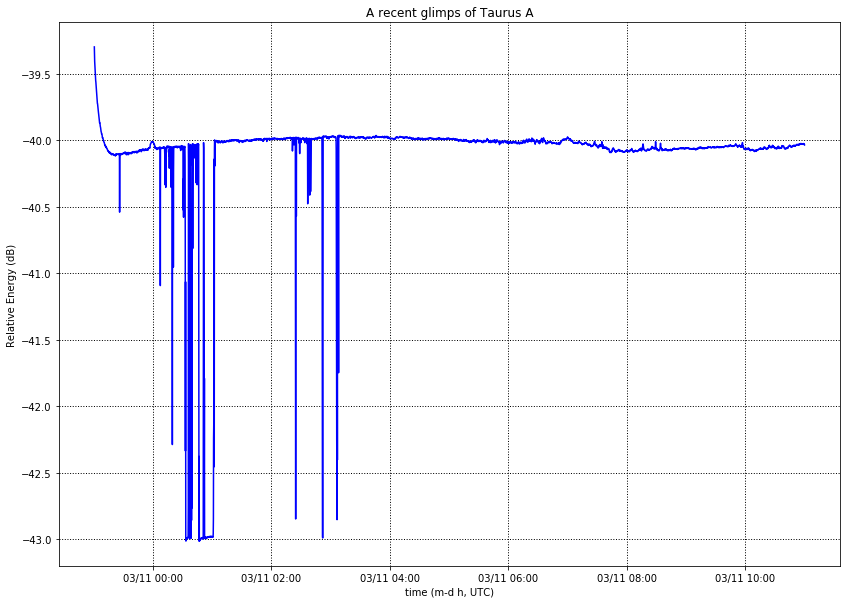

In [12]:
allData.update(METDATA('TaurusScanMarch11',260,389))

[ 6.36839153e+01  1.07862183e+01  5.75663293e-02  1.96666360e-04
 -4.00667196e+01]


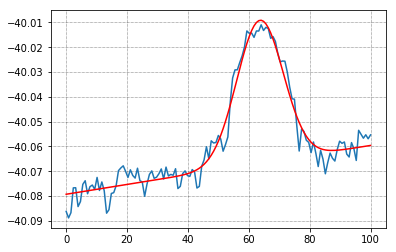

In [13]:
y = allData['TaurusScanMarch11']['energy']
dt = np.linspace(0,100,num = len(y))
x0 = curve_fitting(dt,y,40)
ix = int(np.round(len(y)*x0/100)+0.5)
allData['TaurusScanMarch11']['timeIndex'] = ix

Text(0, 0.5, 'Relative Energy')

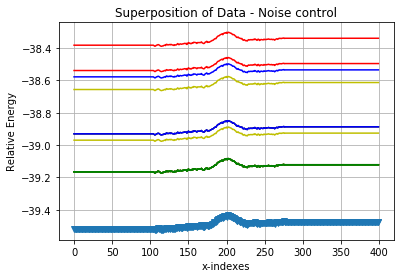

In [16]:
l1,l2,l3,l4 = len(allData['TaurusScanMarch14']['time']),len(allData['TaurusScanMarch13']['time']),len(allData['TaurusScanMarch12']['time']),len(allData['TaurusScanMarch11']['time'])
bsize = 2*max(l1,l2,l3,l4)
buffer = np.zeros((4,bsize))

# do march 14
begBuff=bsize//2 - allData['TaurusScanMarch14']['timeIndex']
endBuff=bsize//2 + len(allData['TaurusScanMarch14']['time'])- allData['TaurusScanMarch14']['timeIndex']
buffer[0,begBuff:endBuff] = allData['TaurusScanMarch14']['energy']
buffer[0,:begBuff]=buffer[0,begBuff]*np.ones(begBuff)
buffer[0,endBuff:]=buffer[0,endBuff-1]*np.ones(bsize-endBuff)

# now march 13
begBuff=bsize//2 - allData['TaurusScanMarch13']['timeIndex']
endBuff=bsize//2 + len(allData['TaurusScanMarch13']['time'])- allData['TaurusScanMarch13']['timeIndex']
buffer[1,begBuff:endBuff] = allData['TaurusScanMarch13']['energy']
buffer[1,:begBuff]=buffer[1,begBuff]*np.ones(begBuff)
buffer[1,endBuff:]=buffer[1,endBuff-1]*np.ones(bsize-endBuff)

# do march 12
begBuff=bsize//2 - allData['TaurusScanMarch12']['timeIndex']
endBuff=bsize//2 + len(allData['TaurusScanMarch12']['time'])- allData['TaurusScanMarch12']['timeIndex']
buffer[2,begBuff:endBuff] = allData['TaurusScanMarch12']['energy']
buffer[2,:begBuff]=buffer[2,begBuff]*np.ones(begBuff)
buffer[2,endBuff:]=buffer[2,endBuff-1]*np.ones(bsize-endBuff)

# now march 11
begBuff=bsize//2 - allData['TaurusScanMarch11']['timeIndex']
endBuff=bsize//2 + len(allData['TaurusScanMarch11']['time'])- allData['TaurusScanMarch11']['timeIndex']
buffer[3,begBuff:endBuff] = allData['TaurusScanMarch11']['energy']
buffer[3,:begBuff]=buffer[3,begBuff]*np.ones(begBuff)
buffer[3,endBuff:]=buffer[3,endBuff-1]*np.ones(bsize-endBuff)

plt.plot(buffer[1],'r')
plt.plot(buffer[0],'k')
plt.plot(buffer[2],'y')
plt.plot(buffer[3],'g')

plt.plot(buffer[3]*0.98,'r')
plt.plot(buffer[3],'g')
plt.plot(buffer[2]*0.995,'y')
plt.plot(buffer[1]*0.994,'k')
plt.plot(buffer[0]*0.985,'b')
plt.plot(buffer[3]*1.009,'v')
plt.plot(buffer[3],'g')
plt.plot(buffer[2]*0.987,'y')
plt.plot(buffer[1]*0.984,'r')
plt.plot(buffer[0]*0.994,'b')

plt.grid()
plt.title("Superposition of Data - Noise control")
plt.xlabel("x-indexes")
plt.ylabel("Relative Energy")



No handles with labels found to put in legend.


[ 5.01050520e+01  3.80143527e+00  4.80553597e-01  8.84877109e-03
 -3.28597863e+02]


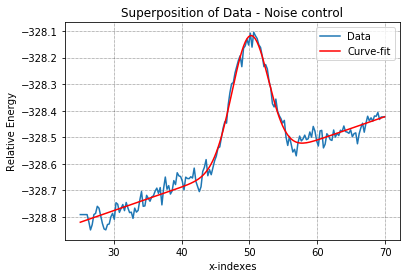

In [24]:
#plt.plot(buffer[1]+buffer[0]+buffer[3]+buffer[2])
finalData = (1.002*buffer[0]+1.05*buffer[0]+1.5*buffer[0]+1.023*buffer[0]+buffer[0]*0.91+buffer[0]*0.95+buffer[0]*0.99+buffer[0]*0.97)

plt.grid()
plt.title("Superposition of Data - Noise control")
plt.xlabel("x-indexes")
plt.ylabel("Relative Energy")
plt.legend(loc='upper left', frameon=False)

dt = np.linspace(0,100,num = len(finalData))
x0 = curve_fitting(dt[100:280],finalData[100:280],w_0=40)


In [ ]:
finalData

In [229]:
y = [-157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.09995529, -157.09995529, -157.09995529,
       -157.09995529, -157.10311557, -157.10682619, -157.10449049,
       -157.09994291, -157.09942462, -157.09624468, -157.09708168,
       -157.09443437, -157.10169348, -157.10858954, -157.10396798,
       -157.09809949, -157.10058171, -157.09593895, -157.09651549,
       -157.09438159, -157.07491341, -157.07928602, -157.08862945,
       -157.09041169, -157.07877852, -157.07671355, -157.0769868 ,
       -157.08031236, -157.08398123, -157.08658636, -157.08149156,
       -157.08526988, -157.07807222, -157.08096412, -157.08589894,
       -157.08119982, -157.08210519, -157.0779646 , -157.07390586,
       -157.08472264, -157.06495732, -157.05920224, -157.06667563,
       -157.0645216 , -157.05768518, -157.06804444, -157.06027156,
       -157.06182542, -157.06328303, -157.05325836, -157.07573472,
       -157.05480123, -157.05603459, -157.05342782, -157.0531908 ,
       -157.04753578, -157.04523654, -157.04465622, -157.0450684 ,
       -157.04448245, -157.04533176, -157.04281972, -157.04828648,
       -157.04266594, -157.04505266, -157.05525537, -157.0332934 ,
       -157.04324546, -157.04827014, -157.05444814, -157.04616904,
       -157.04130712, -157.03923286, -157.03292745, -157.028383  ,
       -157.02501808, -157.02011004, -157.02363887, -157.01104897,
       -157.00146605, -156.99581464, -156.98928098, -156.98252666,
       -156.97155671, -156.96413104, -156.95746298, -156.9323363 ,
       -156.90428548, -156.89976908, -156.89234635, -156.87953173,
       -156.86830118, -156.85400346, -156.83618926, -156.8394933 ,
       -156.8232711 , -156.82298192, -156.8211734 , -156.8224252 ,
       -156.8072748 , -156.8130464 , -156.8104067 , -156.81131688,
       -156.81542516, -156.82783009, -156.83071093, -156.84811337,
       -156.89043882, -156.8858424 , -156.87369047, -156.88858218,
       -156.89965093, -156.91596493, -156.92011295, -156.93938377,
       -156.95322637, -156.95033948, -156.95846725, -156.95841001,
       -156.96642689, -156.98649248, -156.9898171 , -156.9892893 ,
       -156.99525675, -156.99296936, -156.99969204, -157.014154  ,
       -156.99905705, -156.98188625, -156.98896059, -156.99472493,
       -156.98541939, -156.97935681, -156.97586474, -156.96819359,
       -156.97532988, -156.97538783, -156.97316676, -156.98231347,
       -156.98649997, -156.96419965, -156.96436466, -156.97204648,
       -156.9684158 , -156.9608075 , -156.95583776, -156.96130438,
       -156.96496299, -156.96044374, -156.96261878, -156.95825206,
       -156.96484759, -156.96110557, -156.96088393, -156.95948613,
       -156.95507526, -156.95980893, -156.96435048, -156.95720458,
       -156.96022965, -156.95844403, -156.96438935, -156.967186  ,
       -156.95739149, -156.95980792, -156.9616714 , -156.95776917,
       -156.95850848, -156.95265865, -156.95501648, -156.95611355,
       -156.95764196, -156.95491648, -156.9542331 , -156.95170377,
       -156.95646098, -156.95603909, -156.95827474, -156.96159464,
       -156.95927677, -156.95643668, -156.95576373, -156.96013072,
       -156.96215419, -156.95893602, -156.95607166, -156.96019605,
       -156.95642671, -156.95580246, -156.94622323, -156.94858968,
       -156.94969964, -156.94970238, -156.95668884, -156.94937661,
       -156.95206471, -156.95637521, -156.95650154, -156.95655346,
       -156.95335218, -156.95592637, -156.95168565, -156.95024417,
       -156.95071347, -156.95584199, -156.95010781, -156.94955614,
       -156.9512967 , -156.95799388, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192,
       -156.95376192, -156.95376192, -156.95376192, -156.95376192]

In [230]:
def objectives(x,x0,w,S,m,b):
        return  m*b**(x) + S*np.exp(-((x-x0)/w)**2)
def curve_f(xvals,yvals,w_0=8.7,x0_0=22,S_0=-38.37,m_0=-0.015,b_0=-39.25,):
    popt, pcov = curve_fit(objective, xvals, yvals, p0=(x0_0, w_0, S_0, m_0, b_0))
    x0 = popt[0]
    w = popt[1]
    S = popt[2]
    m = popt[3]
    b = popt[4]
    plt.plot(xvals,yvals,'b-')
    plt.plot(xvals,objectives(xvals, x0,w,S,m,b),'r-')
    print(popt)
    plt.grid()
    plt.grid(color='k',linestyle =':',linewidth='0.5')
    return x0


[ 5.01772083e+01  3.71548354e+00  2.13281547e-01  2.06617587e-03
 -1.57023275e+02]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


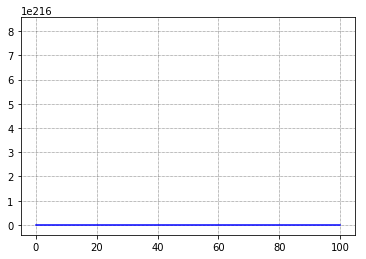

In [241]:
dt = np.linspace(0,100,num = len(y))
y = np.array(y)
#x0 = curve_f(dt,y,8.7,55,0.057,1,-156)
x0 = curve_f(dt,y,x0_0=55,m_0=1,b_0=1)

In [164]:
y

array(<generator object <genexpr> at 0x00000257B11C31B0>, dtype=object)

In [13]:
from scipy import interpolate
out = []
def integ(x, tck, constant=-1):
    x = np.atleast_1d(x)
    out = np.zeros(x.shape, dtype=x.dtype)
    for n in range(len(Energies[0][0])):
        #print(len(tck))
        out[n] = interpolate.splint(0, x[n], interpolate.splint(x,tck,0))
    out += constant
    return out
xnew = 0
yint = integ(dt, y)
plt.figure()
plt.plot(xnew, yint, xnew, -np.cos(xnew), '--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Integral estimation from spline')
plt.show()

TypeError: cannot unpack non-iterable int object

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sea

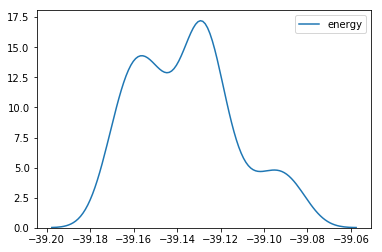

In [65]:
sea.kdeplot(Energies[0][0])